# Oscilador armónico relativista

El lagrangiano de una partícula relativista en una dimensión que se encuentra en un potencial V es $L = -mc^2 \sqrt{1 - \frac{v^2}{c^2}} - V $, donde $V = \frac{k x^2}{2}$ en un oscilador armónico.[1]

$\frac{\partial L}{\partial v} =  \frac{m v}{\sqrt{1 - \frac{v^2}{c^2}}}$  $\longrightarrow$ $\frac{d}{dt}\frac{\partial L}{\partial v} =  \frac{m \dot{v}}{\left(1 - \frac{v^2}{c^2}\right)^{\frac{3}{2}}}$

$\frac{\partial L}{\partial x} = -kx$

La ecuación de movimiento que resulta es $\ddot{x} =- \left(1 - \frac{\dot{x}^2}{c^2}\right)^{\frac{3}{2}}\frac{k x}{m}$

Como resultado la ecuación de movimiento es una ecuación diferencial de segundo orden no lineal, parte de su solución debe entregarse con dos condiciones iniciales(su posición y velocidad) ademas de valores del sistema como lo es la masa de la partícula y el valor de la constante k, una forma de "facilitar" el trabajo es por medio de la energía ya que como L no depende del tiempo la energía del sistema es constante siendo igual al hamiltoniano.

$H = Px - L =\frac{m v^2}{\sqrt{1-\frac{v^2}{c^2}}} + mc^2 \sqrt{1 - \frac{v^2}{c^2}} + \frac{kx^2}{2} = E$

$E - \frac{kx}{2} = \frac{mc^2}{\sqrt{1-\frac{v^2}{c^2}}} $

$(E - \frac{kx}{2})^2 = \frac{m^2c^4}{1-\frac{v^2}{c^2}}$

$\dot{x} = c \sqrt{1 - \frac{m^2c^4}{\left(E - \frac{kx^2}{2}\right)^2}}$

Ahora el problema se resume en resolver una ecuación diferencial de primer grado por lo que solo es necesario dar la condición inicial para la posición, por otro lado se añade un nuevo parámetro el cual es la energía del sistema pero la energía se puede escribir como $\frac{kx_0^2}{2}$ donde $x_0$ es la posición inicial.

Si bien se ve más simple el segundo modo por potencia de maquina y otros errores computacionales se deicidio darle solución a la ecuación de segundo grado.

Al igual que en [2] se decide usar un valor de $c=1$ y construir un sistema tal que $k = m = 1$ o $\frac{k}{m} = 1$ lo cual también ayudo en la ejecución de los cálculos.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
from scipy.constants import c

In [2]:
w=1


CI=[0,0.1,0.7,0.9,0.9999]

t=np.linspace(0,100,1000)

def mov(a,t):
    return[a[1],-(1-(a[1])**2)**(1.5) * w*a[0]]

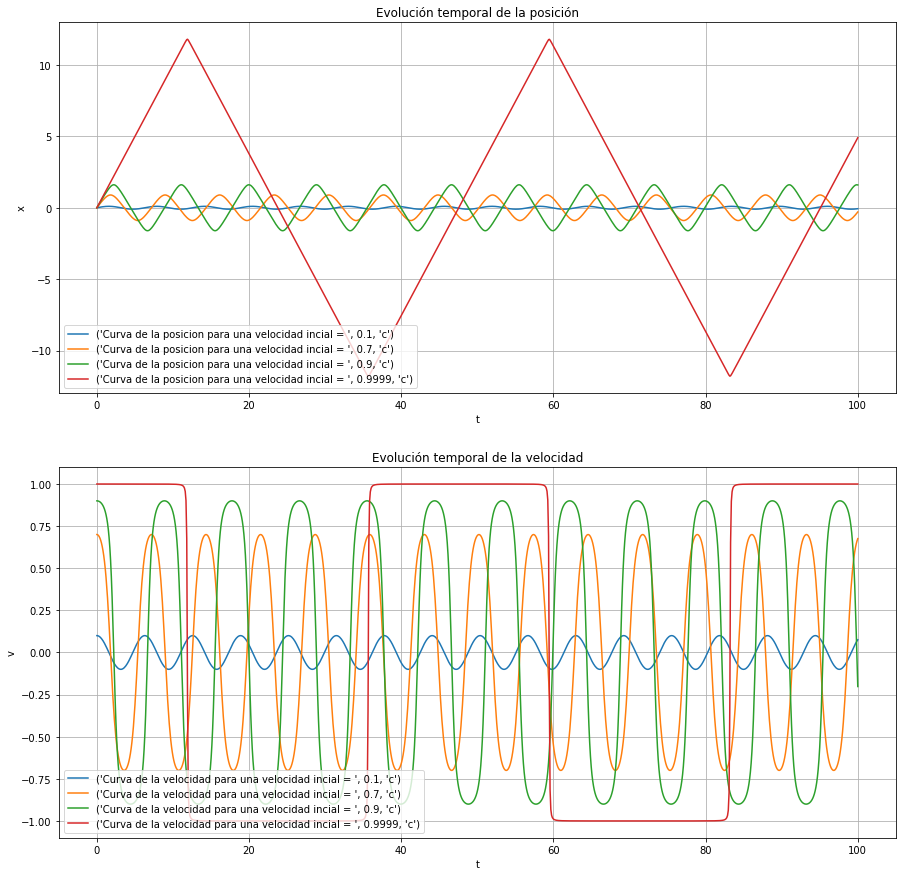

In [9]:
f = plt.figure(figsize=(15,15))

ax1 = f.add_subplot(211)
plt.grid()
ax2 = f.add_subplot(212)
plt.grid()


ax1.set_title("Evolución temporal de la posición")
ax1.set_xlabel("t")
ax1.set_ylabel("x")

ax2.set_title("Evolución temporal de la velocidad")
ax2.set_xlabel("t")
ax2.set_ylabel("v")


for i in range (1,len(CI)):

    sol=odeint(mov,[CI[0],CI[i]],t)
    x=sol[:,0]
    v=sol[:,1]
    ax1.plot(t,x,label=("Curva de la posicion para una velocidad incial = ",CI[i],"c"))
    ax2.plot(t,v,label=("Curva de la velocidad para una velocidad incial = ",CI[i],"c"))
ax1.legend(loc=3)
ax2.legend(loc=3)
plt.show()

Por Primer punto a observar es la como la el comportamiento de la partícula es de una función triangular cuando su velocidad inicial tiene a la velocidad de la luz en el vació, por otro lado al disminuir dicha velocidad inicial tanto la amplitud como el periodo se disminuyen y el comportamiento va tomando una forma oscilatoria tendiendo a una función armónica lo cual es lo esperado ya que es el comportamiento de un oscilador armónico no relativista.

Por el comportamiento de la posición es de esperar que para una velocidad inicial cercana  a la de la luz la velocidad se comportara como una función escalón y conforme se disminuye se convierte en una función armónica (como se espera del caso no relativista), en efecto ese fue el resultado hallado para las velocidades.

De forma análoga con la velocidad se halla un comportamiento periódico el cual no es armónico para velocidades iniciales cercanas a la velocidad de la luz y conforme se disminuye va tomando comportamientos armónicos.

La primera gran diferencia entre el caso relativista y el no relativista es el comportamiento de pasar de una función armónica hasta una función triangular, por otro lado ese cambio para valores menores a $V_0 = 0.9 c$ apenas se diferencian, un lado que si se hace familiar del oscilador armónico relativista es que al igual que el no relativista es la obtención de movimientos periódicos.

Al igual que en [3] cuyo comportamiento de x es una función triangular al tener una velocidad inicial que se acerca a c y un marcado comportamiento que parece armónico al alejarse de ese valor.

[1]Classical Mechanics, 3rd Edition, Goldstein, Herbert, capiitulo 7, pag 312-317

[2]Relativistic massless harmonic oscillator,K. Kowalski and J. Rembielinski

[3]Relativistic (an)harmonic oscillator,William Moreau, Richard Easther, and Richard Neutze